In [ ]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

219330792/219330792 [==============================] - 2s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                

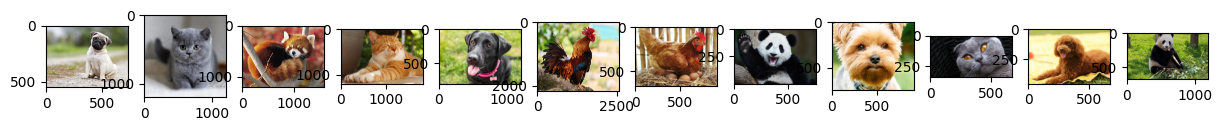

(12, 480, 480, 3)


In [ ]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-732x549-thumbnail-732x549.jpg")
urls.append("https://cdn.dotpe.in/longtail/store-items/7908103/yegRmfT9.jpeg")
urls.append("https://wallpaperaccess.com/full/3396763.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://www.thesun.co.uk/wp-content/uploads/2019/09/NINTCHDBPICT000492607142-e1567357146264.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")
urls.append("https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg")
urls.append("https://www.hartz.com/wp-content/uploads/2022/04/small-dog-owners-1.jpg")
urls.append("https://cdns.klimg.com/merdeka.com/i/w/news/2022/09/25/1475625/670x335/jenis-kucing-lucu-dan-imut-kenali-karakteristiknya.jpg")
urls.append("https://foto.kontan.co.id/10msR37SIwTtk3fRnCC3V07yqzQ=/smart/filters:format(webp)/2021/11/20/1170767902p.jpg")
urls.append("https://cdnwpedutorenews.gramedia.net/wp-content/uploads/2021/11/09162143/bahasa-panda.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [ ]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  elif(np.argmax(yh[i]) >= 7 and np.argmax(yh[i])<=8 ) :
      print("Ayam")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=388):
      print("Panda")

1/1 [==============================] - 17s 17s/step
Anjing
Kucing
Panda
Kucing
Anjing
Ayam
Ayam
Panda
Anjing
Kucing
Anjing
Panda
